# Set up

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")  # append parent dir to sys.path

In [3]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
from main import params, CODE_REGIONS, REGIONS

In [5]:
plt.rcParams.update(params)
sns.set_style("white")

# Analysis

In [6]:
# PATH_TO_WEATHER = Path("../data/raw/eco2mix-regional-cons-def.csv")
# data = pd.read_csv(PATH_TO_WEATHER, sep=";")
# df = data[COLUMNS_TO_KEEP]
# joblib.dump(df, "../data/selection/production.joblib")

TCO Eolien (%) -> Taux de couverture de la production éolienne

TCH Eolien (%) -> Taux de charge de la production éolienne

In [7]:
COLUMNS_TO_KEEP = [
    "Code INSEE région",
    "Région",
    "Nature",
    "Date",
    "Heure",
    "Date - Heure",
    "Consommation (MW)",
    "Eolien (MW)",
    "TCO Eolien (%)",
    "TCH Eolien (%)",
]

In [8]:
data = joblib.load("../data/selection/production.joblib")

In [9]:
data["TCH Eolien (%)"] = data["TCH Eolien (%)"].replace("-", None).astype("float")

In [10]:
joblib.dump(data, "../data/selection/production.joblib")

['../data/selection/production.joblib']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594944 entries, 0 to 1594943
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Code INSEE région  1594944 non-null  int64  
 1   Région             1594944 non-null  object 
 2   Nature             1594944 non-null  object 
 3   Date               1594944 non-null  object 
 4   Heure              1594944 non-null  object 
 5   Date - Heure       1594944 non-null  object 
 6   Consommation (MW)  1594932 non-null  float64
 7   Eolien (MW)        1594836 non-null  float64
 8   TCO Eolien (%)     122688 non-null   float64
 9   TCH Eolien (%)     122112 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 121.7+ MB


In [12]:
data.describe()

,Code INSEE région,Consommation (MW),Eolien (MW),TCO Eolien (%),TCH Eolien (%)
count,1.594944e+06,1.594932e+06,1.594836e+06,122688.000000,122112.000000
mean,4.991667e+01,4.502622e+03,2.312373e+02,9.797102,27.151304
std,2.564001e+01,2.185006e+03,3.851385e+02,12.427154,23.918640
min,1.100000e+01,8.920000e+02,-6.000000e+00,-0.070000,-0.080000
25%,2.775000e+01,2.787000e+03,2.400000e+01,0.970000,7.130000
50%,4.800000e+01,4.108000e+03,9.600000e+01,4.880000,20.120000
75%,7.525000e+01,5.749000e+03,2.720000e+02,14.100000,41.670000
max,9.300000e+01,1.533800e+04,4.135000e+03,92.490000,100.000000


In [13]:
data

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Eolien (MW),TCO Eolien (%),TCH Eolien (%)
0,24,Centre-Val de Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
1,52,Pays de la Loire,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
2,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
3,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1594939,52,Pays de la Loire,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2710.0,94.0,3.47,9.08
1594940,27,Bourgogne-Franche-Comté,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,1923.0,466.0,24.23,55.48
1594941,28,Normandie,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2547.0,74.0,2.91,8.74
1594942,53,Bretagne,Données consolidées,2020-07-31,23:30,2020-07-31T23:30:00+02:00,2236.0,48.0,2.15,4.55


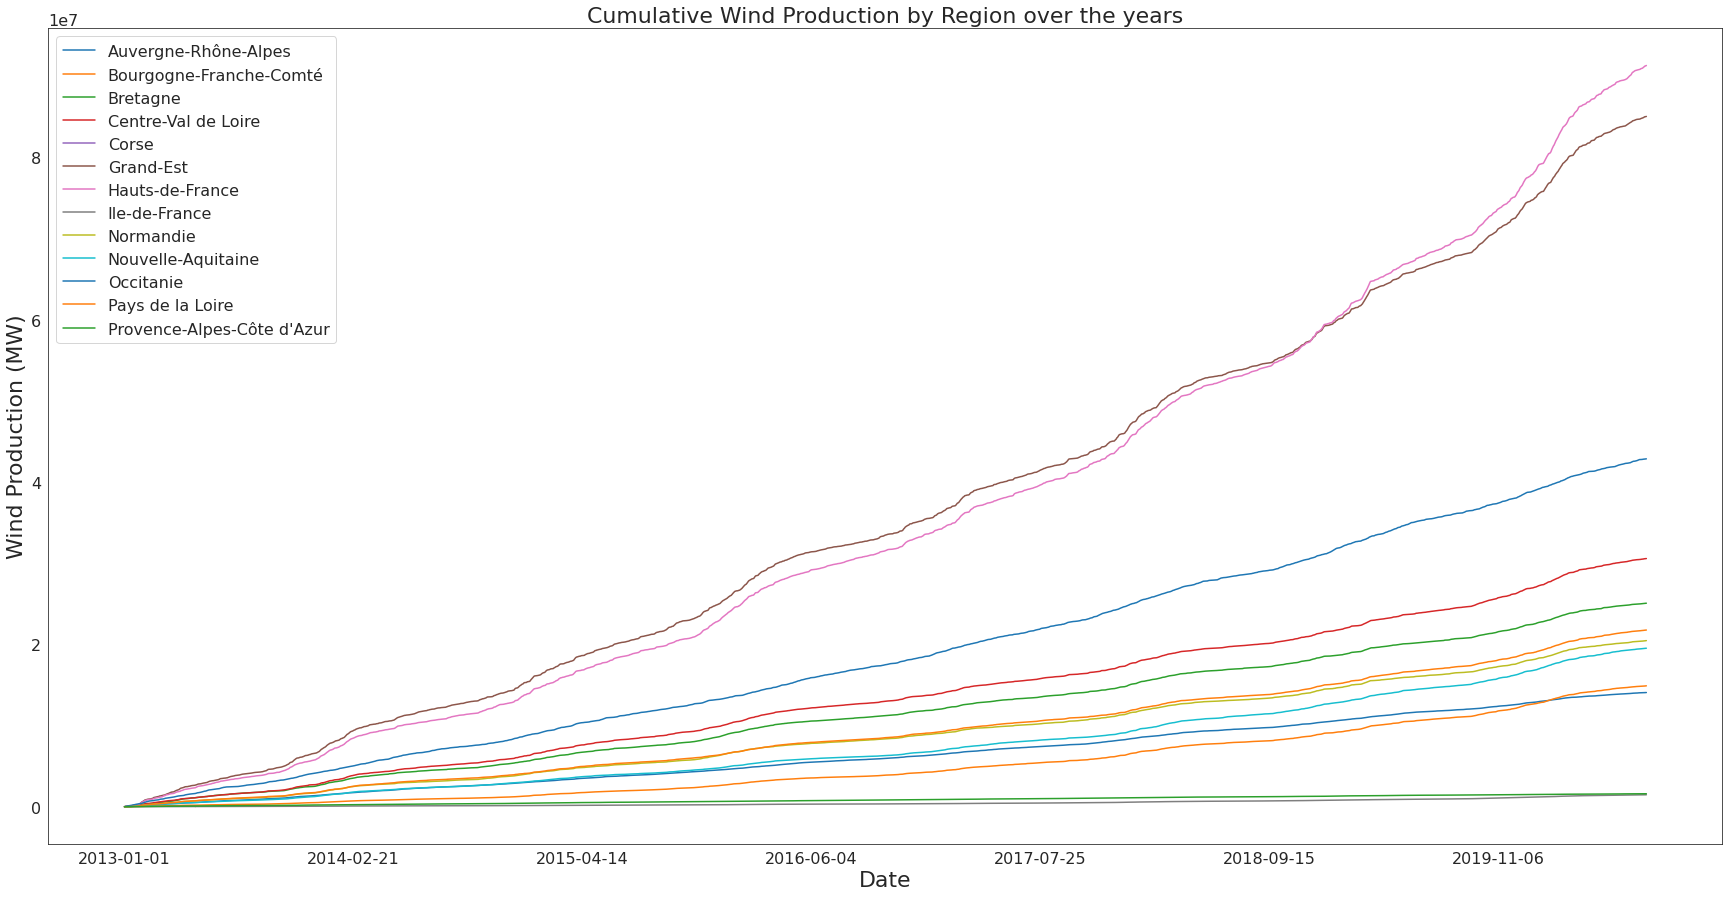

In [15]:
for region in REGIONS:
    df = data[data["Région"] == region]
    df = df.set_index("Date", drop=True).sort_values("Date")
    df["Eolien (MW)"].cumsum().plot()
    plt.xlabel("Date")
    plt.ylabel("Wind Production (MW)")
    plt.title(f"Cumulative Wind Production by Region over the years")
    plt.legend(REGIONS)